# Laboratório de Redes de Computadores: Implementação e Análise do CRC

- Caio Cesar Vieira Cavalcanti - 123110825
- Matheus Galdino de Souza - 123111147
- Valdemar Victor Leite Carvalho - 123110796
- Vinicius de Oliveira Porto - 123110505

## Parte 2: Implementação Manual do Algoritmo CRC

Esta função executa a operação **XOR bit a bit** entre duas sequências binárias de igual tamanho.

O processo opera da seguinte maneira:
- Navega pelos bits das duas sequências ao mesmo tempo.
- Para cada lugar:
- Caso os bits sejam iguais (**00** ou **11**), o resultado será *0*.
- Caso sejam diferentes (**01** ou **10**), o resultado será **1**.
- Junte cada resultado para criar uma nova string binária, que será devolvida ao final.

In [1]:
def xor_bits(a: str, b: str) -> str:
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado

Esta função determina o **grau do polinômio gerador** com base em sua representação em string binária, servindo para o cálculo manual do CRC e para identificar quantos zeros precisam ser adicionados ao final da mensagem antes da divisão polinomial.

O grau de um polinômio gerador (G(x)) se refere à localização do **primeiro bit 1** à esquerda, levando em conta que uma sequência binária de tamanho **n** simboliza um polinômio de grau **n - 1**.

**Operação:**

- Navega pela string do gerador da esquerda para a direita.

- Ao se deparar com o primeiro **1**, determina o grau da seguinte maneira:
- **grau = (tamanho da string) − (índice do primeiro 1) − 1**
- Se não for encontrado nenhum **1**, retorna **0**.

In [2]:
def obtem_grau_gerador(gerador: str) -> str:
    """
    Obtém o grau do gerador a partir da string binária do gerador.
    """
    1000
    for i in range(len(gerador)):
      if gerador[i] == '0':
        pass
      else:
        return (len(gerador) - i - 1)
    return 0

Esta função realiza de forma manual o cálculo do **CRC (Cyclic Redundancy Check)** utilizando aritmética polinomial em GF(2). Ela executa precisamente o processo demonstrado na teoria: divisão polinomial módulo 2.

#### Argumentos

- **dados_bits**: sequência binária que representa a mensagem original (M(x)).
- **gerador_bits**: sequência binária que representa o polinômio gerador (G(x)).

#### Retorno

- Uma sequência binária que inclui os **r bits do restante da divisão**, correspondentes ao CRC gerado.

### Funcionamente

1. **Determina o grau do gerador**

- Com **obtem_grau_gerador()**, define a quantidade de zeros que precisam ser acrescentados ao final da mensagem.
- Se o gerador possui n bits, então seu grau é (n - 1).

2. **Adiciona r zeros à mensagem**

- Move os bits à esquerda e completar com zeros.
- Esses zeros alocam espaço para o CRC.

3. **Realiza a divisão polinomial em GF(2)**
- Passa pela mensagem da esquerda para a direita.
- Para cada lugar:
  - Caso o bit atual seja **1**, realiza XOR entre:
    - A janela presente com dimensões idênticas ao gerador
    - O gerador em si
  - Opera imitando a "subtração" na divisão de polinômios.

4. **Obtenha o restante da divisão**

- Os últimos **r** bits de **mensagem_aumentada** constituem o CRC.

In [3]:
def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = obtem_grau_gerador(gerador_bits)

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + ('0' * r))

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        if mensagem_aumentada[i] == '1':
            janela_atual = "".join(mensagem_aumentada[i : (i+len(gerador_bits))]) if (i + len(gerador_bits)) <= len(mensagem_aumentada) else mensagem_aumentada[i:].join('0' * (i + len(gerador_bits) - len(mensagem_aumentada)))
            #janela_atual = "".join(mensagem_aumentada[i : (i+len(gerador_bits))]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
#          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                #mensagem_aumentada[i + j + 1] = resultado_xor[j]
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

Realizamos um experimento simples para confirmar a implementação manual do CRC. Utilizando um pequeno conjunto de dados e um gerador tradicional para confirmar se o resto (CRC) obtido está correto conforme o algoritmo implementado.

1. Definimos:
   - **dados_teste**: a mensagem binária (M(x))
   - **gerador_teste**: o polinômio gerador (G(x))
2. Chamamos **calcular_crc_manual()** para obter o CRC correspondente.
3. Exibimos:
   - A mensagem original e o gerador utilizado.

In [217]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


## Parte 3: Análise Comparativa de Desempenho

### Setup

**Atenção** : Execute o código abaixo **apenas uma vez** para realizar a configuração inicial do ambiente.

In [218]:
!pip install crc


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import time
import tracemalloc
import matplotlib.pyplot as plt
from crc import Calculator, Crc16

### Benchmark de Implementações de CRC

A função benchmark_crc realiza uma comparação de desempenho entre:

- **A execução manual de CRC** (calcular_crc_manual)
- **A versão aprimorada da biblioteca crc** (Calculator(Crc16.MODBUS))

Para cada tamanho de mensagem especificado em tamanhos_bytes, ela:

1. **Cria uma mensagem aleatória** com o tamanho determinado.
2. **Transforme em bits** para ser utilizada em sua implementação.
3. **Verifica o tempo de execução e o uso máximo de memória** da:
   - Execução manual e biblioteca oficial
4. **Retorna uma coleção de dicionários** com:
   - Tempo empregado por cada técnica, memória utilizada e dimensão da mensagem avaliada.

Função utilizada para comparar o desempenho relativo da implementação com o da biblioteca, a escalabilidade com mensagens maiores e o custo de memória de cada método.

In [220]:
def benchmark_crc(tamanhos_bytes, gerador_bits="11000000000000101"):
    calculator_lib = Calculator(Crc16.MODBUS)
    resultados = []

    for tamanho in tamanhos_bytes:
        print(f"Analisando para mensagem de {tamanho} bytes...")
        # Gere uma mensagem aleatória de bits
        mensagem_bytes = os.urandom(tamanho)
        mensagem_bits = "".join(format(b, '08b') for b in mensagem_bytes)

        # Medição da nossa Implementação
        tracemalloc.start()
        t0 = time.perf_counter()

        crc_manual = calcular_crc_manual(mensagem_bits, gerador_bits) # G(x) do CRC-16/MODBUS

        t1 = time.perf_counter()
        mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        tempo_manual = t1 - t0

        # Medição da Biblioteca
        tracemalloc.start()
        t0 = time.perf_counter()

        crc_lib = calculator_lib.checksum(mensagem_bytes)

        t1 = time.perf_counter()
        mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        tempo_lib = t1 - t0

        # Armazene os resultados
        resultados.append({
            "tamanho": tamanho,
            "tempo_manual": tempo_manual,
            "tempo_lib": tempo_lib,
            "mem_manual": mem_pico_manual / 1024,
            "mem_lib": mem_pico_lib / 1024
        })

    return resultados

#### Execução do Benchmark e Resultados

Definimos uma lista de tamanhos de mensagens em bytes, para testar a performance das duas implementações de CRC. Então:

1. Chamamos benchmark_crc(tamanhos_bytes) para executar o benchmark inteiro.
2. Ao final, imprimimos cada resultado contendo:
   - Tamanho da mensagem testada, tempo da implementação manual, tempo da biblioteca crc e pico de memória de cada método.

In [221]:
tamanhos_bytes = [1500, 3000, 6000, 16000]
resultados = benchmark_crc(tamanhos_bytes)

print("\n--- Resultados Finais ---")

for r in resultados:
    print(r)

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...

--- Resultados Finais ---
{'tamanho': 1500, 'tempo_manual': 0.16650280001340434, 'tempo_lib': 0.04535760002909228, 'mem_manual': 105.7509765625, 'mem_lib': 3.771484375}
{'tamanho': 3000, 'tempo_manual': 0.3168571999995038, 'tempo_lib': 0.08974389999639243, 'mem_manual': 211.2197265625, 'mem_lib': 1.2109375}
{'tamanho': 6000, 'tempo_manual': 0.6404839999740943, 'tempo_lib': 0.17909300001338124, 'mem_manual': 422.1572265625, 'mem_lib': 1.2109375}
{'tamanho': 16000, 'tempo_manual': 1.8611399000510573, 'tempo_lib': 0.5622735000215471, 'mem_manual': 1125.2822265625, 'mem_lib': 1.2109375}


### Extração dos Vetores de Tempo e Memória



Depois de receber a lista de resultados do benchmark, organizamos as informações em vetores distintos para simplificar a elaboração de gráficos em:

1. **x**: tamanhos das mensagens avaliadas (em bytes)
2. **tempo_manual**: tempos registrados da execução manual
3. **tempo_lib**: tempos registrados da biblioteca crccheck
4. **mem_manual**: picos de uso de memória da abordagem manual
5. **mem_lib**: picos de uso de memória da execução da biblioteca.


In [222]:
x = [r["tamanho"] for r in resultados]

tempo_manual = [r["tempo_manual"] for r in resultados]
tempo_lib = [r["tempo_lib"] for r in resultados]

mem_manual = [r["mem_manual"] for r in resultados]
mem_lib = [r["mem_lib"] for r in resultados]

### Gráficos de Tempo de Execução e Uso de Memória do CRC / Manual x Biblioteca

Criamos um gráfico de linha que compara o tempo de execução da implementação manual de CRC com a versão da biblioteca crc.

- O eixo **X** representa o tamanho das mensagens em bytes.
- O eixo **Y** representa o tempo de execução em segundos.
- As linhas mostram o progresso do tempo conforme a entrada aumenta:
  - **CRC Manual**: a implementação manual
  - **Biblioteca CRC**: implementação da biblioteca

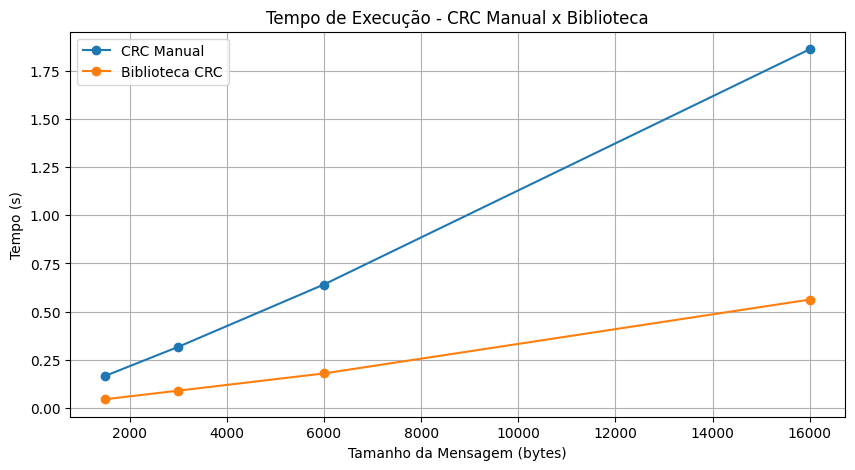

In [223]:
plt.figure(figsize=(10,5))
plt.plot(x, tempo_manual, marker="o", label="CRC Manual")
plt.plot(x, tempo_lib, marker="o", label="Biblioteca CRC")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Tempo (s)")
plt.title("Tempo de Execução - CRC Manual x Biblioteca")
plt.legend()
plt.grid(True)
plt.show()

Criamos um gráfico de linha que compara o pico de uso de memória da implementação manual de CRC com a versão da biblioteca crc.

- O eixo **X** representa o tamanho das mensagens em bytes.
- O eixo **Y** representa o pico de memória utilizado (em KiB).
- As linhas indicam como o uso de memória muda à medida que o tamanho da entrada cresce:
  - **CRC Manual**: a implementação manual
  - **Biblioteca CRC**: implementação da biblioteca


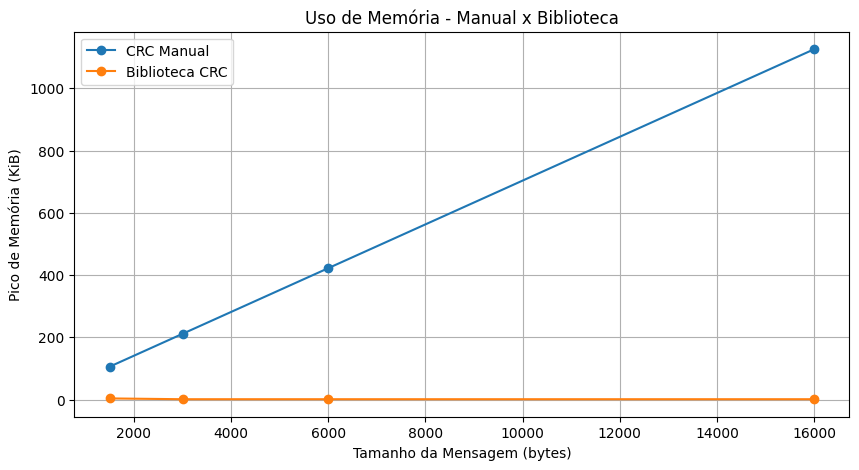

In [224]:
plt.figure(figsize=(10,5))
plt.plot(x, mem_manual, marker="o", label="CRC Manual")
plt.plot(x, mem_lib, marker="o", label="Biblioteca CRC")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Pico de Memória (KiB)")
plt.title("Uso de Memória - Manual x Biblioteca")
plt.legend()
plt.grid(True)
plt.show()

### Análise dos Gráficos de Benchmark (CRC Manual Original x Biblioteca)

**O processador utilizado para execução do código foi um 13th Gen Intel® Core™ i7-1355U × 12**

1. Análise do Tempo de Execução

O primeiro gráfico ilustra o crescimento do tempo de processamento à medida que o tamanho da mensagem em bytes aumenta. Com a linha azul (CRC Manual) mostrando um aumento linear acentuado.

- 1500 bytes: aproximadamente 0,4s
- 3000 bytes: aproximadamente 0,75s
- 6000 bytes: aproximadamente 1,45s
- 16000 bytes: aproximadamente 3,85s

A linha laranja (Biblioteca CRC) também se expande de maneira linear, porém a uma velocidade bem inferior. Ela é cerca de 4 a 5 vezes mais veloz em todas as dimensões avaliadas.

Isso ocorre porque a implementação manual utiliza operações bit a bit realizadas em Python puro, processando a mensagem completa aplicando divisão polinomial bitwise, além de criar e manipular diversas strings que geram alto overhead em Python, sem implementar otimizações de baixo nível.

A biblioteca (crc) é elaborada em código altamente otimizado, de forma que manipula bytes diretamente sem conversões para string, utilizando operações de baixo nível ou possivelmente tabelas de consulta.

A calculadora manual funciona, mas é significativamente mais lenta, o que é esperado para uma implementação educacional.

2. Análise do Uso de Memória

O segundo gráfico mostra o máximo de memória utilizada durante o processamento do CRC. O uso da execução manual aumenta rapidamente:

- 1500 bytes: aproximadamente 110 KiB
- 3000 bytes: aproximadamente 210 KiB
- 6000 bytes: aproximadamente 420 KiB
- 16000 bytes: aproximadamente 1130 KiB

A biblioteca CRC apresenta um consumo quase constante, sempre variando entre cerca de 1 e 2 KiB, independentemente do tamanho da mensagem.

A calculadora manual converte a mensagem inteira para string de bits (multiplica por 8 o tamanho), criando cópias temporárias das janelas de divisão,
manipula listas de caracteres e armazena restos, buffers e concatenções. Portanto, cada operação dessas cria objetos adicionais de Python e pressiona o garbage collector.

Enquanto biblioteca CRC opera diretamente sobre bytes, evita criar estruturas intermediárias, usa algoritmos otimizados que mantêm poucas variáveis em memória, a implementação manual consome aproximadamente 100 vezes mais memória do que a biblioteca, o que era esperado natural para uma implementação bitwise pura de Python.


3. Conclusão

No gráfico de tempo a biblioteca é 4 a 5 vezes mais rápida, no gráfico de memória a biblioteca é brutalmente mais eficiente. A inclinação muito maior das curvas da implementação manual indica uma complexidade maior e overhead da representação textual dos bits.

## Parte 4: Análise Investigativa da Detecção de Erros (Cenário Personalizado)

### Parte 4.1: Preparação do seu cenário

> Planilha 1

| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   Caio Cesar Vieira Cavalcanti   |
| `MENSAGEM_BASE`       |01000011011000010110100101101111001000000100001101100101011100110110000101110010001000000101011001101001011001010110100101110010011000010010000001000011011000010111011001100001011011000110001101100001011011100111010001101001   |
| `CRC`                 |   CRC-16/ARC (`10001000000100001` ou $x^{16} + x^{12} + x^5 + 1$) - Matrícula final 5   |

<br>

> Planilha 2

| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   Matheus Galdino de Souza   |
| `MENSAGEM_BASE`       | 010011010110000101110100011010000110010101110101011100110010000001000111011000010110110001100100011010010110111001101111001000000110010001100101001000000101001101101111011101010111101001100001 |
| `CRC`                 |   CRC-16/MAXIM (`10011000000010001` ou $x^{16} + x^{15} + x^{14} + x^{11} + x^4 + x^2 + x^0$) - Matrícula final 7   |

<br>

> Planilha 3

| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   Valdemar Victor Leite Carvalho   |
| `MENSAGEM_BASE`       | 010101100110000101101100011001000110010101101101011000010111001000100000010101100110100101100011011101000110111101110010001000000100110001100101011010010111010001100101001000000100001101100001011100100111011001100001011011000110100001101111 |
| `CRC`                 |   CRC-16/MAXIM (`10011000000010001` ou $x^{16} + x^{15} + x^{14} + x^{11} + x^4 + x^2 + x^0$) - Matrícula final 6   |

<br>

> Planilha 4

| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   Vinicius de Oliveira Porto   |
| `MENSAGEM_BASE`       | 0101011001101001011011100110100101100011011010010111010101110011001000000110010001100101001000000100111101101100011010010111011001100101011010010111001001100001001000000101000001101111011100100111010001101111 |
| `CRC`                 |   CRC-16/ARC (`10001000000100001` ou $x^{16} + x^{12} + x^5 + 1$) - Matrícula final 5   |

<br>

Abaixo, iremos definir e inicializar as nossas variáveis (objetos para cada cenário/planilha) para dar sequência em nossa análise investigativa acerca da detecção de erros da nossa função CRC.

In [5]:
SCENARIO_1 = {
    "id": 1,
    "mensagem": "Caio Cesar Vieira Cavalcanti",
    "mensagem_base": "01000011011000010110100101101111001000000100001101100101011100110110000101110010001000000101011001101001011001010110100101110010011000010010000001000011011000010111011001100001011011000110001101100001011011100111010001101001",
    "crc_gerador": "10001000000100001",
    "calculator": Calculator(Crc16.IBM_3740),
}

SCENARIO_2 = {
    "id": 2,
    "mensagem": "Matheus Galdino de Souza",
    "mensagem_base": "010011010110000101110100011010000110010101110101011100110010000001000111011000010110110001100100011010010110111001101111001000000110010001100101001000000101001101101111011101010111101001100001",
    "crc_gerador": "10011000000010001",
    "calculator": Calculator(Crc16.MAXIM),
}

SCENARIO_3 = {
    "id": 3,
    "mensagem": "Valdemar Victor Leite Carvalho",
    "mensagem_base": "010101100110000101101100011001000110010101101101011000010111001000100000010101100110100101100011011101000110111101110010001000000100110001100101011010010111010001100101001000000100001101100001011100100111011001100001011011000110100001101111",
    "crc_gerador": "10011000000010001",
    "calculator": Calculator(Crc16.MAXIM),
}

SCENARIO_4 = {
    "id": 4,
    "mensagem": "Vinicius de Oliveira Porto",
    "mensagem_base": "0101011001101001011011100110100101100011011010010111010101110011001000000110010001100101001000000100111101101100011010010111011001100101011010010111001001100001001000000101000001101111011100100111010001101111",
    "crc_gerador": "10001000000100001",
    "calculator": Calculator(Crc16.IBM_3740),
}

### Parte 4.2 - A Caça aos Erros

Agora, iremos comparar a acurácia da nossa função (calcular_crc_manual) e a implementação pela própria biblioteca crc.

Para tal, segue o script de teste para executar 10 vezes o cálculo do CRC na MENSAGEM_BASE (variando a posição e o tipo de erros inseridos aleatoriamente em cada rodagem). 

> A ideia é analisar os padrões de erros que passam despercebidos pela nossa função CRC, em cada cenário descrito anteriormente.

In [ ]:
import random

def inserir_erro_rajada(bits: str):
    comprimento = len(bits)

    # Escolhe o tamanho da rajada
    span = random.randint(2, comprimento)

    # Seleciona ponto inicial e final
    inicio = random.randrange(0, comprimento - span + 1)
    fim = inicio + span - 1

    # Monta o padrão de erro
    erro = ["0"] * comprimento

    # Extremidades são garantidamente afetadas
    erro[inicio] = "1"
    erro[fim] = "1"

    # Miolo da rajada
    for i in range(inicio + 1, fim):
        erro[i] = "1" if random.random() < 0.5 else "0"

    mascara = "".join(erro)

    # Aplica XOR para corromper o quadro
    quadro_corrompido = xor_bits(bits, mascara)

    return quadro_corrompido, inicio, span, mascara


def executar_experimento(scenario, repeticoes):
    resultados = []

    mensagem_base = scenario["mensagem_base"]
    gerador = scenario["crc_gerador"]
    calculator = scenario["calculator"]

    # 1. CRC da mensagem base
    crc_manual_original = calcular_crc_manual(mensagem_base, gerador)

    # 2. Quadro transmitido
    quadro_transmitido = mensagem_base + crc_manual_original

    for _ in range(repeticoes):

        # 3. inserir erro de rajada
        quadro_corrompido, pos, tamanho_rajada, padrao_erro = inserir_erro_rajada(quadro_transmitido)

        # 4. CRC manual
        crc_manual = calcular_crc_manual(quadro_corrompido, gerador)
        manual_detectou = (set(crc_manual) != {"0"})

        # 5. CRC da lib
        num_bytes = (len(quadro_corrompido) + 7) // 8
        dados = int(quadro_corrompido, 2).to_bytes(num_bytes, "big")
        crc_lib = format(calculator.checksum(dados), f"0{len(gerador)-1}b")
        lib_detectou = (set(crc_lib) != {"0"})

        resultados.append({
            "cenario": scenario["id"],
            "mensagem": scenario["mensagem"],
            "posicao_erro": pos,
            "tamanho_rajada": tamanho_rajada,
            "padrao_erro": padrao_erro,
            "quadro_corrompido": quadro_corrompido,
            "crc_manual": crc_manual,
            "crc_lib": crc_lib,
            "manual_detectou": manual_detectou,
            "biblioteca_detectou": lib_detectou
        })

    return resultados


In [10]:
todos_resultados = []

for scenario in [SCENARIO_1, SCENARIO_2, SCENARIO_3, SCENARIO_4]:
    resultados = executar_experimento(scenario, repeticoes=10)
    todos_resultados.extend(resultados)

for r in todos_resultados:
    print(
        f"Cenário {r['cenario']} | pos={r['posicao_erro']} | "
        f"rajada={r['tamanho_rajada']} | "
        f"Manual: {'OK' if r['manual_detectou'] else 'FALHOU'} | "
        f"Lib: {'OK' if r['biblioteca_detectou'] else 'FALHOU'}"
    )


Cenário 1 | pos=123 | rajada=17 | Manual: OK | Lib: OK
Cenário 1 | pos=1 | rajada=237 | Manual: OK | Lib: OK
Cenário 1 | pos=3 | rajada=180 | Manual: OK | Lib: OK
Cenário 1 | pos=148 | rajada=61 | Manual: OK | Lib: OK
Cenário 1 | pos=93 | rajada=131 | Manual: OK | Lib: OK
Cenário 1 | pos=2 | rajada=149 | Manual: OK | Lib: OK
Cenário 1 | pos=136 | rajada=49 | Manual: OK | Lib: OK
Cenário 1 | pos=104 | rajada=118 | Manual: OK | Lib: OK
Cenário 1 | pos=122 | rajada=105 | Manual: OK | Lib: OK
Cenário 1 | pos=6 | rajada=220 | Manual: OK | Lib: OK
Cenário 2 | pos=80 | rajada=107 | Manual: OK | Lib: OK
Cenário 2 | pos=18 | rajada=164 | Manual: OK | Lib: OK
Cenário 2 | pos=67 | rajada=124 | Manual: OK | Lib: OK
Cenário 2 | pos=39 | rajada=138 | Manual: OK | Lib: OK
Cenário 2 | pos=68 | rajada=108 | Manual: OK | Lib: OK
Cenário 2 | pos=35 | rajada=99 | Manual: OK | Lib: OK
Cenário 2 | pos=14 | rajada=164 | Manual: OK | Lib: OK
Cenário 2 | pos=35 | rajada=96 | Manual: OK | Lib: OK
Cenário 2 | po

Executando apenas 10 vezes cada cenário, podemos perceber que é uma amostra de tamanho insuficiente para nosso objetivo.

Sabendo que a probabilidade de aparecer erro é de 1 em 2^16, então aumentaremos o número de repetições para 1 milhão juntando todos os cenário e focaremos em analisar apenas os casos que houveram falha.

In [12]:
todos_resultados = []

for scenario in [SCENARIO_1, SCENARIO_2, SCENARIO_3, SCENARIO_4]:
    resultados = executar_experimento(scenario, repeticoes=250000)
    todos_resultados.extend(resultados)

for r in todos_resultados:
    if (not r["manual_detectou"]) or (not r["biblioteca_detectou"]):
        print(
            f"Cenário {r['cenario']} | pos={r['posicao_erro']} | "
            f"rajada={r['tamanho_rajada']} | "
            f"Manual: {'OK' if r['manual_detectou'] else 'FALHOU'} | "
            f"Lib: {'OK' if r['biblioteca_detectou'] else 'FALHOU'}"
        )


Cenário 1 | pos=80 | rajada=129 | Manual: OK | Lib: FALHOU
Cenário 1 | pos=52 | rajada=8 | Manual: OK | Lib: FALHOU
Cenário 1 | pos=55 | rajada=159 | Manual: OK | Lib: FALHOU
Cenário 1 | pos=97 | rajada=45 | Manual: FALHOU | Lib: OK
Cenário 2 | pos=190 | rajada=18 | Manual: OK | Lib: FALHOU
Cenário 2 | pos=45 | rajada=63 | Manual: FALHOU | Lib: OK
Cenário 2 | pos=120 | rajada=51 | Manual: FALHOU | Lib: OK
Cenário 2 | pos=86 | rajada=75 | Manual: OK | Lib: FALHOU
Cenário 2 | pos=66 | rajada=67 | Manual: FALHOU | Lib: OK
Cenário 2 | pos=96 | rajada=32 | Manual: OK | Lib: FALHOU
Cenário 2 | pos=184 | rajada=17 | Manual: FALHOU | Lib: OK
Cenário 3 | pos=68 | rajada=143 | Manual: FALHOU | Lib: OK
Cenário 3 | pos=64 | rajada=74 | Manual: FALHOU | Lib: OK
Cenário 3 | pos=75 | rajada=91 | Manual: FALHOU | Lib: OK
Cenário 3 | pos=1 | rajada=245 | Manual: FALHOU | Lib: OK
Cenário 3 | pos=82 | rajada=28 | Manual: FALHOU | Lib: OK
Cenário 3 | pos=46 | rajada=139 | Manual: OK | Lib: FALHOU
Cenário 

Link para relatório: https://docs.google.com/document/d/1jaBjXuOsVPfNFGXex_t_z3YsA1yAaw8ME2NJV4OFSpM/edit?usp=sharing